# Figure 4 a-d

In [4]:
load("/public/hubCache/workshop/sunhy/projects/song_project/project5/Fig2/Model_lasso_cox_数据下载/模型构建/芯片建模_TCGA验证/OKModel_risk.rdata")

In [5]:
library(CIBERSORT)
library(tidyverse)
library(tidyr)
library(psych)
library(ggpubr)
library(ggExtra)
library(cowplot)
library(pheatmap)

Welcome to 'CIBERSORT' package!
You are using CIBERSORT version 0.1.0

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:lubridate’:

    stamp




In [8]:
tacg_exp = 2^TCGA_risk[,11:17671]-1
entire_exp =  entire_risk[,1:17661]
tacg_exp = t(tacg_exp)
entire_exp = t(entire_exp)

In [9]:
data(LM22)
data(mixed_expr)

In [14]:
results <- cibersort(sig_matrix = LM22, mixture_file = mixed_expr)
tcga_results <- cibersort(sig_matrix = LM22, mixture_file = tacg_exp)
entire_results <- cibersort(sig_matrix = LM22, mixture_file = entire_exp)

In [15]:
library(RColorBrewer)
library(tidyr)
mypalette <- colorRampPalette(brewer.pal(8,"Set1"))

Warning message in data.frame(dat, entire_risk[, c("GZMB", "TIMP1", "SLC39A8", "riskScore")]):
“row names were found from a short variable and have been discarded”


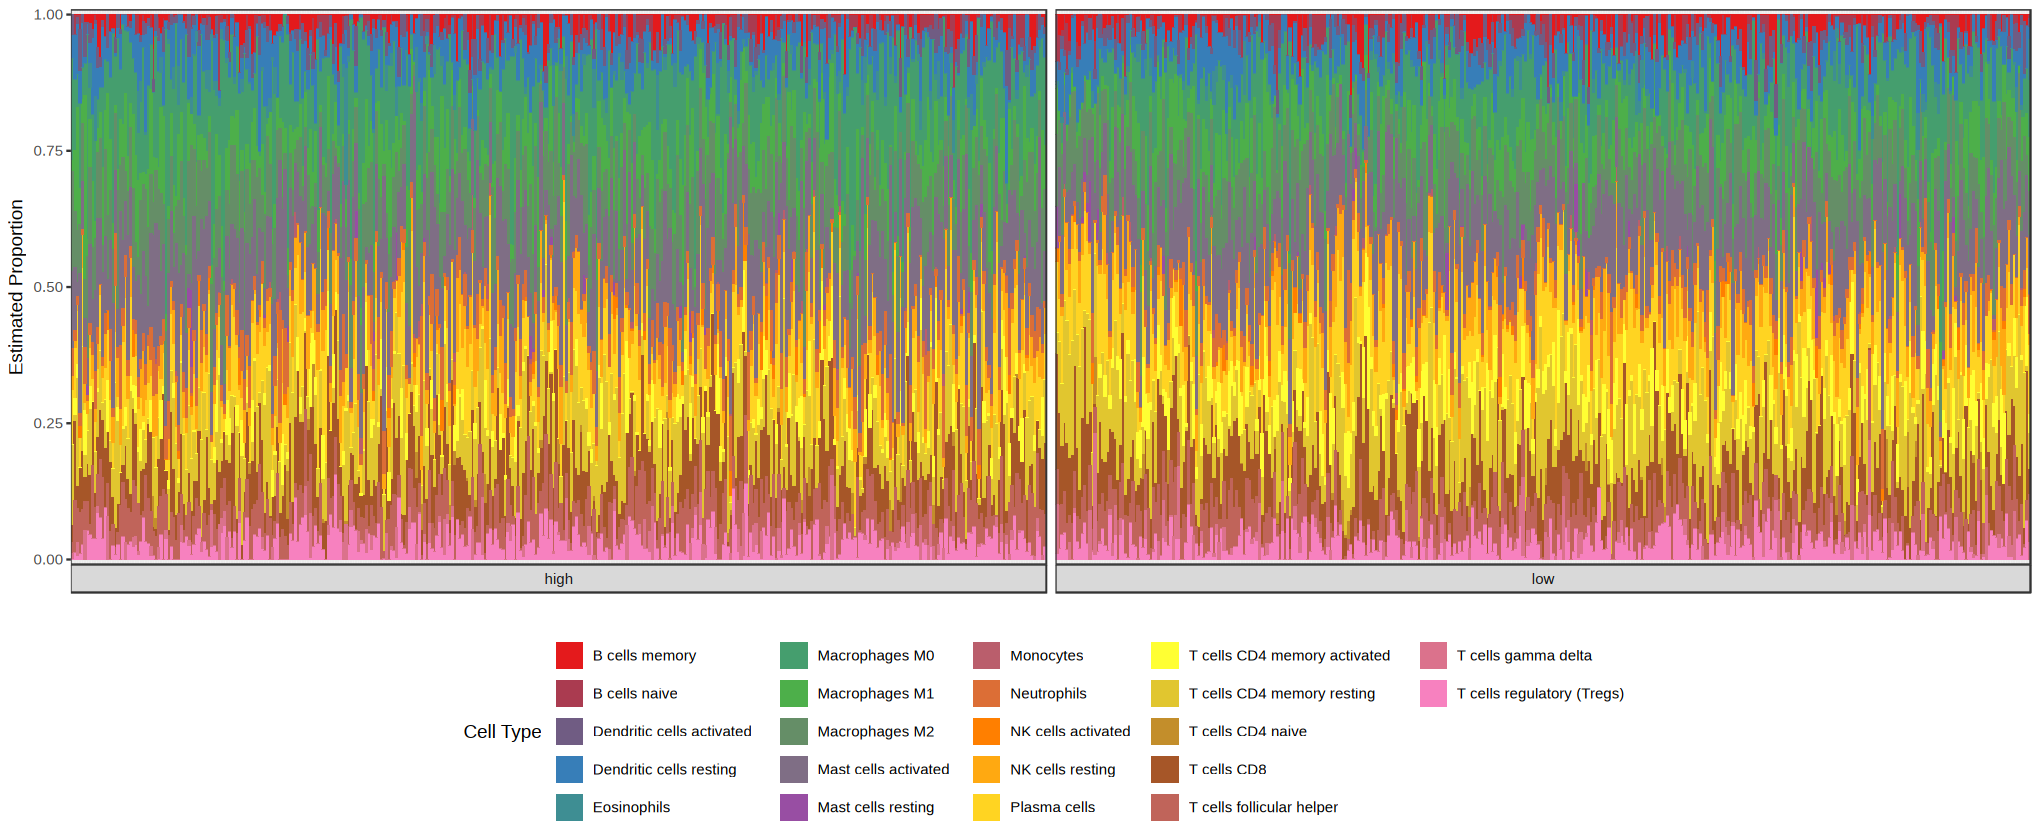

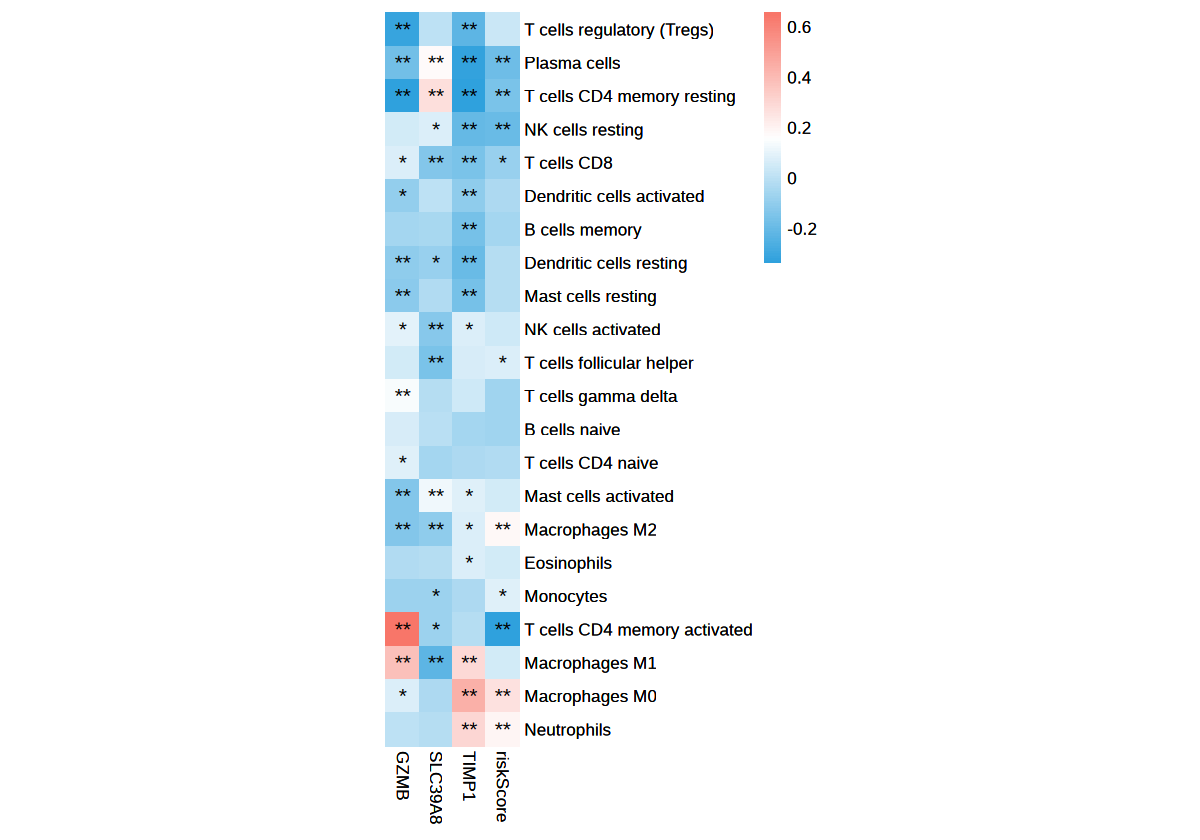

In [16]:
# GEO

enntire_group = data.frame(Sample = rownames(entire_results),Group=entire_risk$risk)
results = entire_results
group = enntire_group

library(pheatmap)
re <- results[,-(23:25)]
k <- apply(re,2,function(x) {sum(x == 0) < nrow(results)/2})
re2 <- as.data.frame(t(re[,k]))
##########构造注释文件
an = data.frame(Group = group$Group,
                row.names = group$Sample)
dat <- re %>% as.data.frame() %>%
  rownames_to_column("Sample") %>% 
  gather(key = Cell_type,value = Proportion,-Sample)
dat = data.frame(dat,group)
dat = data.frame(dat,entire_risk[,c("GZMB","TIMP1","SLC39A8",'riskScore')])
options(repr.plot.width =17,repr.plot.height = 7)
library(RColorBrewer)
mypalette <- colorRampPalette(brewer.pal(8,"Set1"))
g1 = ggplot(dat, aes(x = Sample, y = Proportion, fill = Cell_type)) +
  geom_bar(stat = "identity", position = "stack") +
  facet_grid(~Group, scales = "free_x", space = "free_x", switch = "x") +
  labs(fill = "Cell Type", x = "", y = "Estimated Proportion") +
  theme_bw() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
       legend.position = "bottom") +
  scale_y_continuous(expand = c(0.01, 0)) +
  scale_fill_manual(values = mypalette(22))
g1
ggsave("GEO_cibersortheadbar.pdf",g1,width = 10,height = 5)

dat_ = spread(dat,Cell_type,Proportion)
dat__ = dat_[,-c(1,2,3)]
rownames(dat_) = dat_[,1]
d1 = dat_[,8:29];d2 = dat_[,4:7]
phy = d1;met = d2
#计算相关性
cor <-corr.test(phy, met, method = "pearson",adjust="none")
#提取相关性、p值
cmt <-cor$r
pmt <- cor$p
#判断显著性
if (!is.null(pmt)){
ssmt <- pmt< 0.01
pmt[ssmt] <-'**'
smt <- pmt >0.01& pmt <0.05
pmt[smt] <- '*'
pmt[!ssmt&!smt]<- ''
} else {
  pmt <- F
 }

options(repr.plot.width =10,repr.plot.height = 7)

g2 <- pheatmap(
	cmt,
	scale = "none",
	cluster_row = T, 
	cluster_col = T, 
	border=NA,
	display_numbers = pmt,
	fontsize_number = 12, 
	number_color = "black",
	cellwidth = 20,
	treeheight_col= 0, 
	treeheight_row= 0,
	cellheight =20,
	color=colorRampPalette(c("#2fa1dd", "white", "#f87669"))(100)
)
g2
ggsave("GEO_cor_heat.pdf",g2,width = 5,height = 8)

Warning message in data.frame(dat, TCGA_risk[, c("GZMB", "TIMP1", "SLC39A8", "riskScore")]):
“row names were found from a short variable and have been discarded”


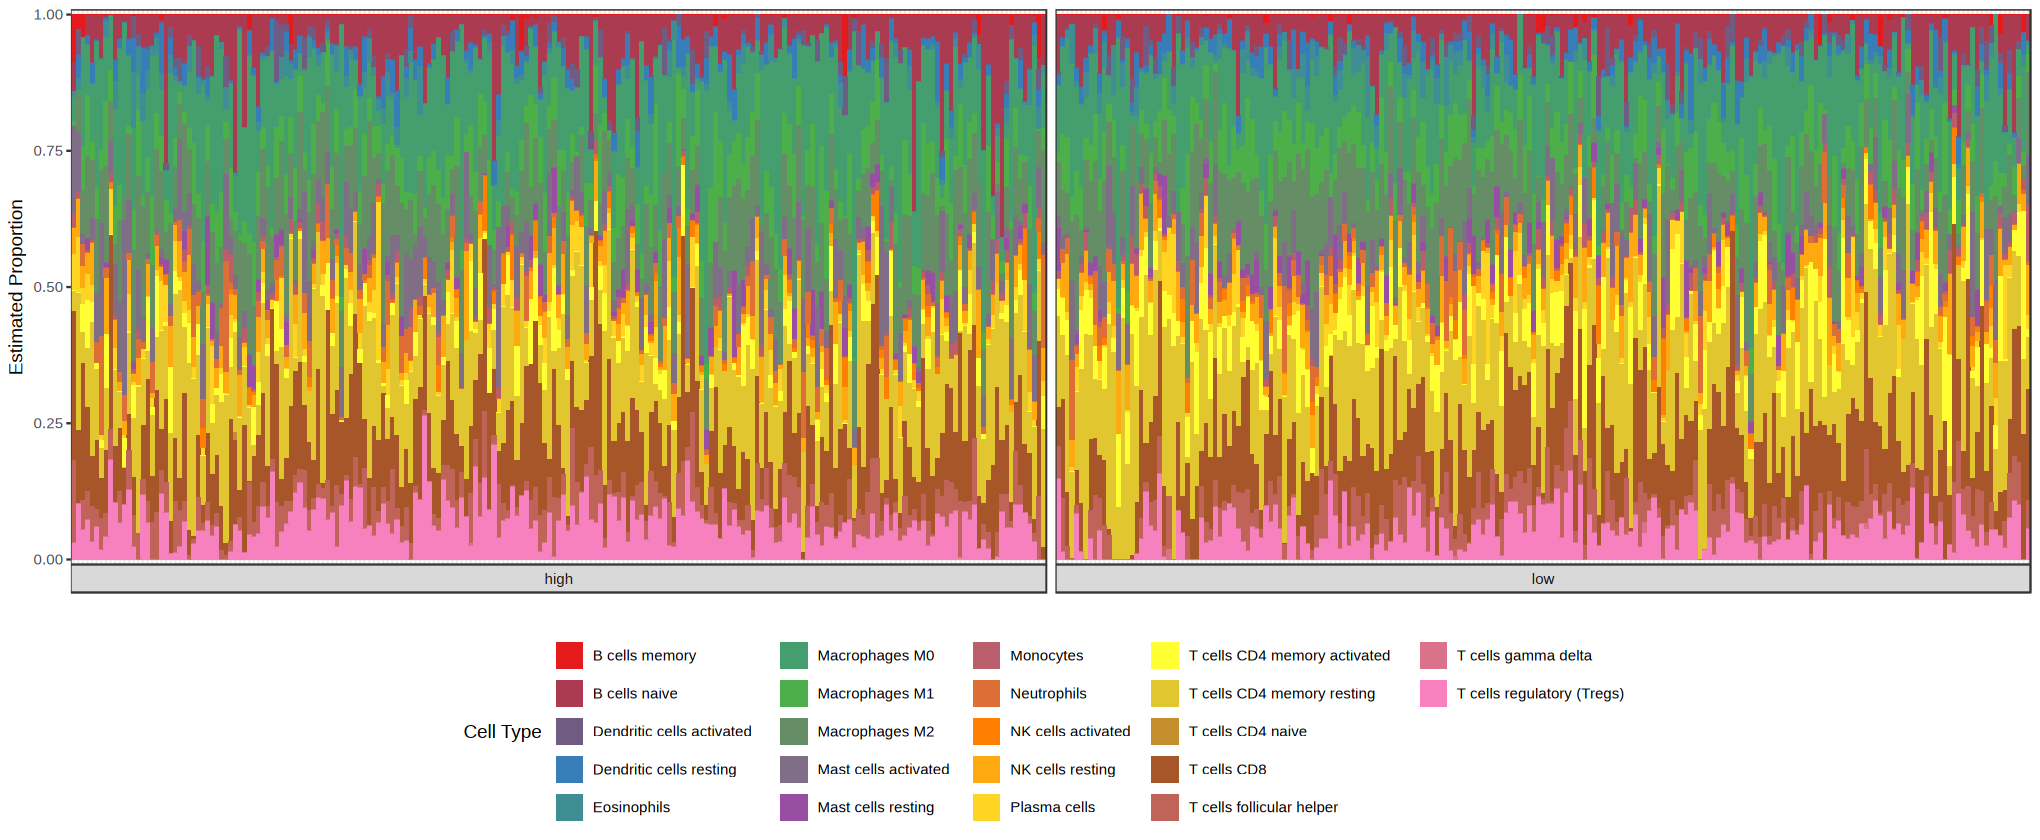

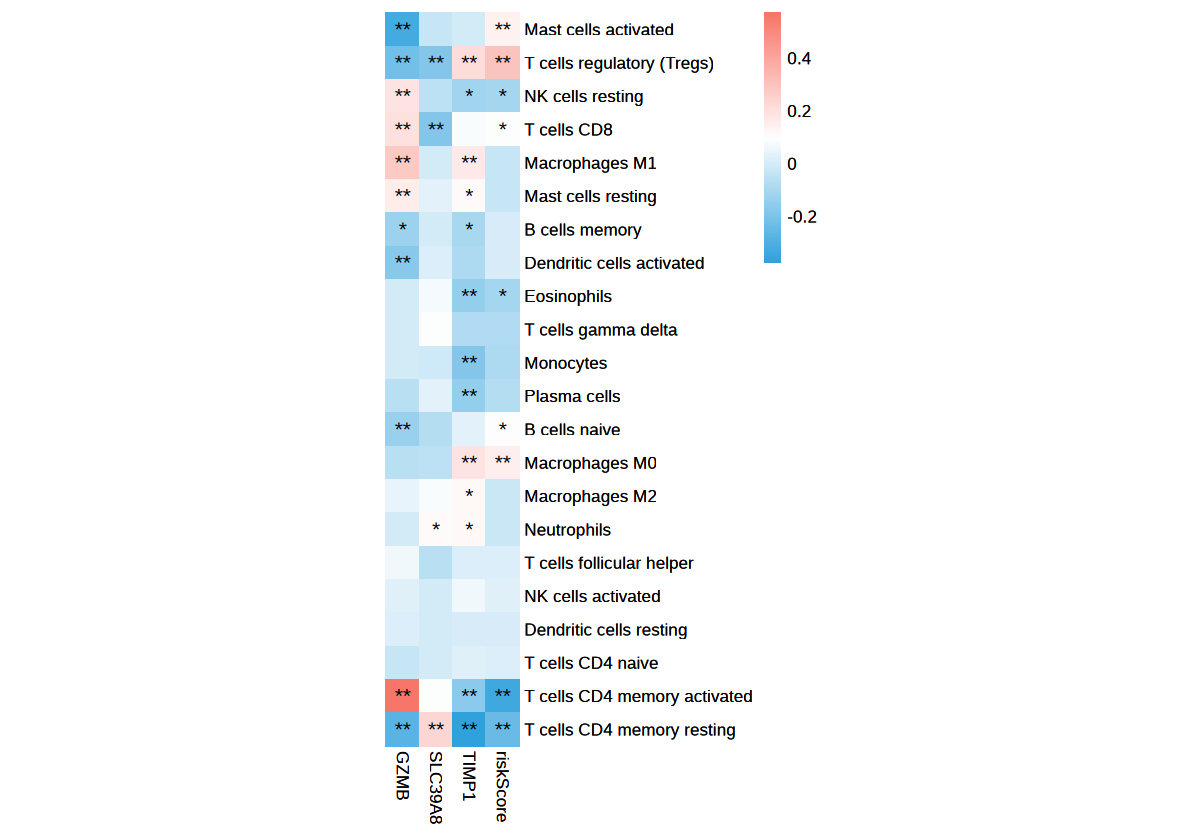

In [17]:
# TCGA

tcga_group = data.frame(Sample = rownames(tcga_results),Group=TCGA_risk$risk)
results = tcga_results
group = tcga_group

library(pheatmap)
re <- results[,-(23:25)]
k <- apply(re,2,function(x) {sum(x == 0) < nrow(results)/2})
re2 <- as.data.frame(t(re[,k]))
##########构造注释文件
an = data.frame(Group = group$Group,
                row.names = group$Sample)
dat <- re %>% as.data.frame() %>%
  rownames_to_column("Sample") %>% 
  gather(key = Cell_type,value = Proportion,-Sample)
dat = data.frame(dat,group)
dat = data.frame(dat,TCGA_risk[,c("GZMB","TIMP1","SLC39A8",'riskScore')])
options(repr.plot.width =17,repr.plot.height = 7)
library(RColorBrewer)
mypalette <- colorRampPalette(brewer.pal(8,"Set1"))
g3 = ggplot(dat, aes(x = Sample, y = Proportion, fill = Cell_type)) +
  geom_bar(stat = "identity", position = "stack") +
  facet_grid(~Group, scales = "free_x", space = "free_x", switch = "x") +
  labs(fill = "Cell Type", x = "", y = "Estimated Proportion") +
  theme_bw() +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
       legend.position = "bottom") +
  scale_y_continuous(expand = c(0.01, 0)) +
  scale_fill_manual(values = mypalette(22))
g3
ggsave("TCGA_cibersortheadbar.pdf",g3,width = 10,height = 5)

dat_ = spread(dat,Cell_type,Proportion)
dat__ = dat_[,-c(1,2,3)]
rownames(dat_) = dat_[,1]
d1 = dat_[,8:29];d2 = dat_[,4:7]
phy = d1;met = d2
#计算相关性
cor <-corr.test(phy, met, method = "pearson",adjust="none")
#提取相关性、p值
cmt <-cor$r
pmt <- cor$p
#判断显著性
if (!is.null(pmt)){
ssmt <- pmt< 0.01
pmt[ssmt] <-'**'
smt <- pmt >0.01& pmt <0.05
pmt[smt] <- '*'
pmt[!ssmt&!smt]<- ''
} else {
  pmt <- F
 }

options(repr.plot.width =10,repr.plot.height = 7)

g4 <- pheatmap(
	cmt,
	scale = "none",
	cluster_row = T, 
	cluster_col = T, 
	border=NA,
	display_numbers = pmt,
	fontsize_number = 12, 
	number_color = "black",
	cellwidth = 20,
	treeheight_col= 0, 
	treeheight_row= 0,
	cellheight =20,
	color=colorRampPalette(c("#2fa1dd", "white", "#f87669"))(100)
)
g4
ggsave("TCGA_cor_heat.pdf",g4,width = 5,height = 8)